# Climatology plts

In [7]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np

In [8]:
clim_ecco = xr.open_dataset('/home/jovyan/chapter1/ECCO-budgets/clim_ecco')
clim_soda = xr.open_dataset('/home/jovyan/chapter1/SODA/clim_soda')
clim_sose = xr.open_dataset('/home/jovyan/chapter1/SOSE-budgets/clim_sose')

In [9]:
clim_ecco

<xarray.Dataset>
Dimensions:              (sigma2_bin: 999, month: 12)
Coordinates:
  * sigma2_bin           (sigma2_bin) float64 1.028e+03 1.028e+03 ... 1.037e+03
  * month                (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    dVdt_clim            (month, sigma2_bin) float32 ...
    psi_vel_clim         (month, sigma2_bin) float32 ...
    omega_clim           (month, sigma2_bin) float64 ...
    omega_mix__clim      (month, sigma2_bin) float64 ...
    omega_surf_slt_clim  (month, sigma2_bin) float64 ...
    omega_surf_th_clim   (month, sigma2_bin) float64 ...
    R1_clim              (month, sigma2_bin) float64 ...
    R2_clim              (month, sigma2_bin) float64 ...
    R3_clim              (month, sigma2_bin) float64 ...

In [10]:
bot_ecco = - clim_ecco.isel(sigma2_bin=-1) + clim_ecco.sel(sigma2_bin=1037.155, method='nearest')
bot_soda = - clim_soda.isel(sigma2_bin=-1) + clim_soda.sel(sigma2_bin=1037.175, method='nearest')
bot_sose = - clim_sose.isel(sigma2_bin=-1) + clim_sose.sel(sigma2_bin=1037.145, method='nearest')

In [5]:
bot_ecco

<xarray.Dataset>
Dimensions:              (month: 12)
Coordinates:
  * month                (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    dVdt_clim            (month) float32 -10.05 -8.308 -8.633 ... -5.882 -8.825
    psi_vel_clim         (month) float32 -8.805 -7.602 -7.422 ... -6.867 -7.556
    omega_clim           (month) float64 -2.07 -1.527 -0.5867 ... 0.5752 -1.814
    omega_mix__clim      (month) float64 -4.101 -4.259 -4.325 ... -4.083 -4.09
    omega_surf_slt_clim  (month) float64 0.4353 0.9331 2.112 ... 2.612 0.6443
    omega_surf_th_clim   (month) float64 0.0006826 -0.0002331 ... -0.008599
    R1_clim              (month) float64 0.8344 0.8672 -0.5567 ... 0.3961 0.5253
    R2_clim              (month) float64 1.595 1.799 1.614 ... 1.96 1.991 1.64
    R3_clim              (month) float64 -0.009091 -0.04576 ... 0.01392 0.02015

In [6]:
clim_budget = - bot_ecco.dVdt_clim + bot_ecco.psi_vel_clim + bot_ecco.omega_clim + bot_ecco.R1_clim + bot_ecco.R2_clim
clim_budget

<xarray.DataArray (month: 12)>
array([1.6039335 , 1.84453078, 1.68144807, 1.70448615, 1.39836172,
       1.75327093, 1.58949619, 1.44090513, 1.85740876, 1.96239689,
       1.97739291, 1.61968241])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [7]:
clim_budget = - bot_soda.dVdt_clim - bot_soda.psi_vel_clim + bot_soda.omega_clim
clim_budget

<xarray.DataArray (month: 12)>
array([ 2.43591722e-02, -7.10542736e-15,  0.00000000e+00,  8.88178420e-15,
       -3.55271368e-15,  0.00000000e+00,  2.13162821e-14, -3.55271368e-15,
       -3.55271368e-15, -1.77635684e-15,  0.00000000e+00,  0.00000000e+00])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [7]:
clim_bdgt_nores = - bot_ecco.dVdt_clim + bot_ecco.psi_vel_clim + bot_ecco.omega_clim
clim_bdgt_nores

<xarray.DataArray (month: 12)>
array([-0.82526331, -0.82139919,  0.62420845,  0.73903585,  1.81649108,
        0.95273792, -0.28447736,  0.30354821,  0.6864804 , -0.03972972,
       -0.4100275 , -0.54543191])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

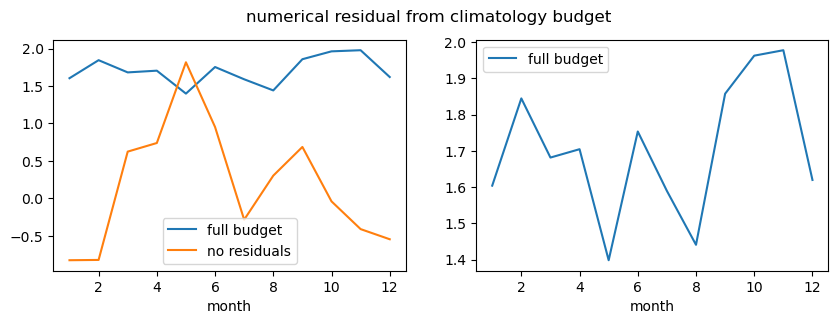

In [8]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(10,3))
clim_budget.plot(ax=ax0, label='full budget')
clim_bdgt_nores.plot(ax=ax0, label='no residuals')

clim_budget.plot(ax=ax1, label='full budget')

ax0.legend()
ax1.legend()
plt.suptitle('numerical residual from climatology budget');

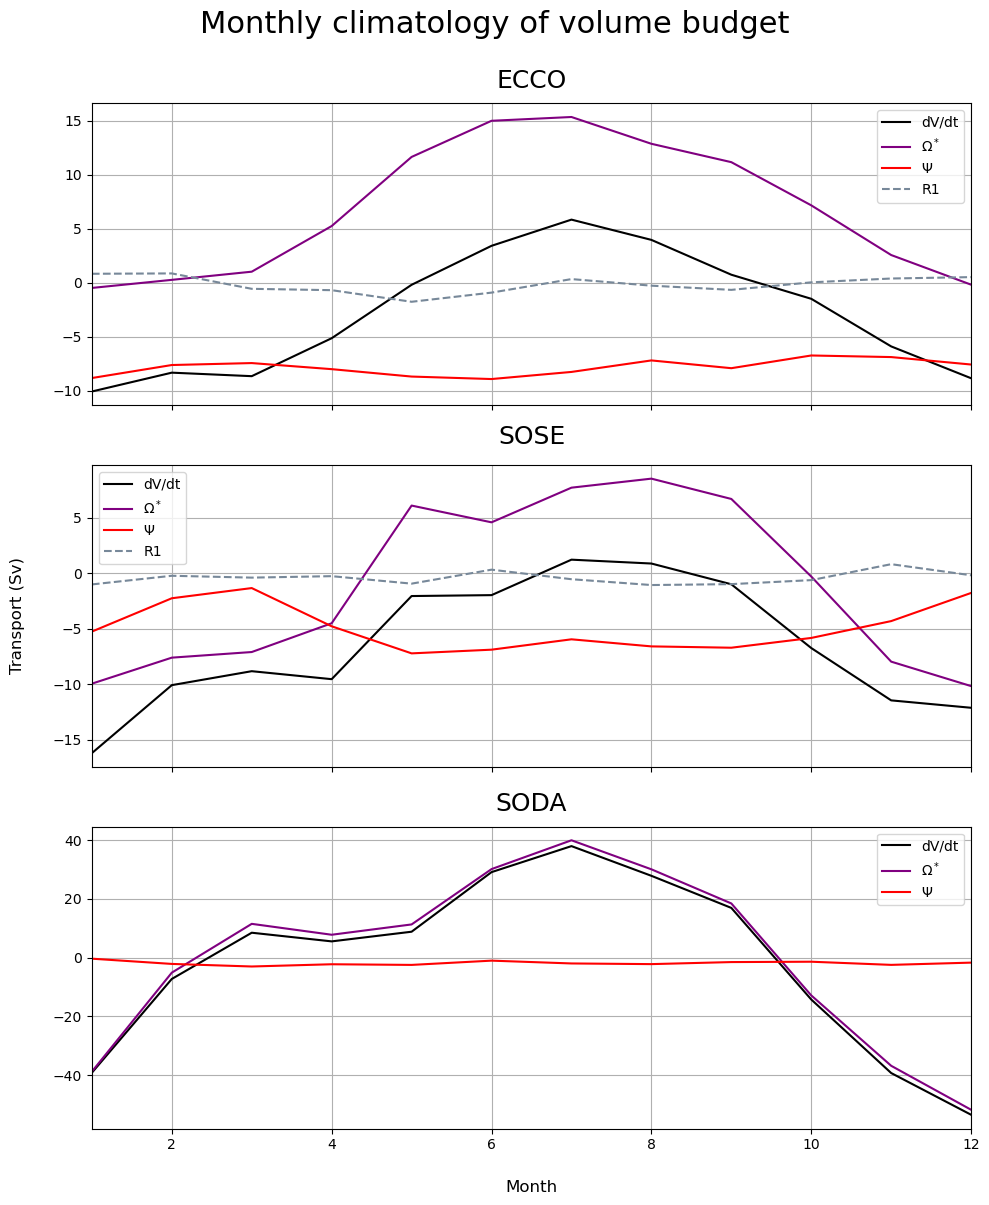

In [12]:
fig, (ax0,ax1,ax2) = plt.subplots(3,1, figsize=(10,12), sharex=True)

bot_ecco.dVdt_clim.plot(label='dV/dt', color='k', ax=ax0)
(bot_ecco.omega_clim+bot_ecco.R2_clim).plot(label=r'$\Omega^*$', color='purple', ax=ax0)
bot_ecco.psi_vel_clim.plot(label=r'$\Psi$', color='red', ax=ax0)
bot_ecco.R1_clim.plot(label='R1', color='lightslategray', linestyle='--', ax=ax0)
ax0.set_xlabel('')
ax0.set_ylabel('')
ax0.legend()
ax0.grid()
ax0.set_title('ECCO', fontsize=18, pad=11)
ax0.set_xlim(1, 12)

bot_sose.dVdt_clim.plot(label='dV/dt', color='k', ax=ax1)
(bot_sose.omega_clim+bot_sose.R2_clim).plot(label=r'$\Omega^*$', color='purple', ax=ax1)
bot_sose.psi_vel_clim.plot(label=r'$\Psi$', color='red', ax=ax1)
bot_sose.R1_clim.plot(label='R1', color='lightslategray', linestyle='--', ax=ax1)
ax1.set_ylabel(r'Transport (Sv)', fontsize=12, labelpad=20)
ax1.set_title('SOSE', fontsize=18, pad=15)
ax1.set_xlabel('')
ax1.legend()
ax1.grid()

bot_soda.dVdt_clim.plot(label='dV/dt', color='k', ax=ax2)
bot_soda.omega_clim.plot(label=r'$\Omega^*$', color='purple', ax=ax2)
(-bot_soda.psi_vel_clim).plot(label=r'$\Psi$', color='red', ax=ax2)
ax2.grid()
ax2.legend()
ax2.set_ylabel('')
ax2.set_xlabel('')
ax2.set_title('SODA', fontsize=18, pad=11)
ax2.set_xlabel('Month', fontsize=12, labelpad=20)

plt.suptitle('Monthly climatology of volume budget', fontsize=22, y=1)
plt.tight_layout()
plt.savefig('clim-stacked.pdf', transparent=True);

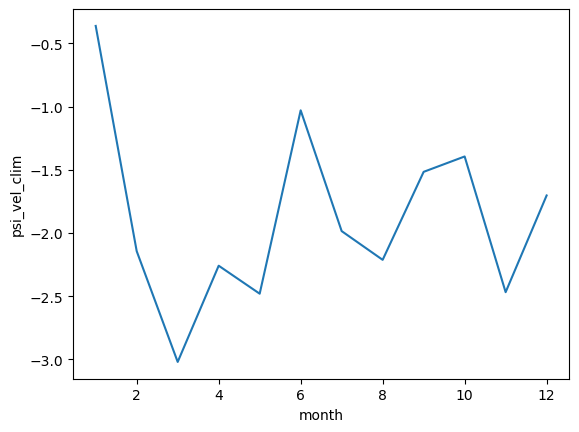

In [12]:
(-bot_soda.psi_vel_clim).plot()

## $\Omega$'s components

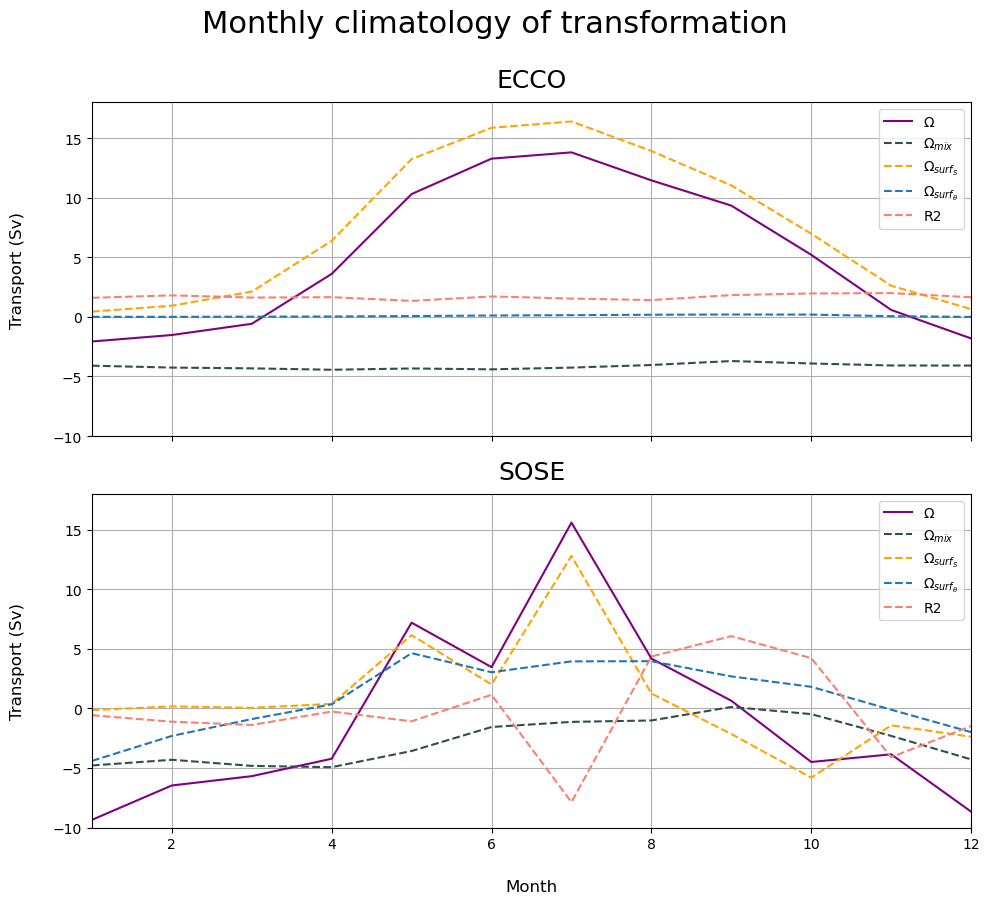

In [13]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(10,9), sharex=True)

bot_ecco.omega_clim.plot(label=r'$\Omega$', color='purple', ax=ax0)
bot_ecco.omega_mix__clim.plot(label=r'$\Omega_{mix}$', color='darkslategrey', linestyle='dashed', ax=ax0)
bot_ecco.omega_surf_slt_clim.plot(label=r'$\Omega_{surf_S}$', color='orange', linestyle='dashed', ax=ax0)
bot_ecco.omega_surf_th_clim.plot(label=r'$\Omega_{surf_\theta}$', color='C0', linestyle='dashed', ax=ax0)
bot_ecco.R2_clim.plot(label='R2', color='salmon', linestyle='--', ax=ax0)
ax0.set_xlabel('')
ax0.set_ylabel(r'Transport (Sv)', fontsize=12, labelpad=20)
ax0.legend()
ax0.grid()
ax0.set_title('ECCO', fontsize=18, pad=11)
ax0.set_ylim(-10,18)
ax0.set_xlim(1, 12)

bot_sose.omega_clim.plot(label=r'$\Omega$', color='purple', ax=ax1)
bot_sose.omega_mix__clim.plot(label=r'$\Omega_{mix}$', color='darkslategrey', linestyle='dashed', ax=ax1)
bot_sose.omega_surf_slt_clim.plot(label=r'$\Omega_{surf_S}$', color='orange', linestyle='dashed', ax=ax1)
bot_sose.omega_surf_th_clim.plot(label=r'$\Omega_{surf_\theta}$', color='C0', linestyle='dashed', ax=ax1)
bot_sose.R2_clim.plot(label='R2', color='salmon', linestyle='--', ax=ax1)
ax1.grid()
ax1.legend()
ax1.set_xlabel('Month', fontsize=12, labelpad=20)
ax1.set_ylabel(r'Transport (Sv)', fontsize=12, labelpad=20)
ax1.set_title('SOSE', fontsize=18, pad=11)
ax1.set_ylim(-10,18)


plt.suptitle('Monthly climatology of transformation', fontsize=22, y=1)
plt.tight_layout()
plt.savefig('clim-omegas-stacked.pdf', transparent=True);